# Практическая работа №1: Краевая задача для уравнения II-го порядка

Выполнил студент гр. 9381 Матвеев Андрей, вариант 8.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения

Задача Коши подразумевает собой поиск частного решения уравнения $y = \phi(x)$ из числа общих, удовлетворяющих некоторым условиям. Общий вид задачи Коши:

\begin{cases}
   f(x, y, y', y'',...,y^{(n)}) = 0\\
   y(x_0) = y_0\\
   y'(x_0) = y_1\\
   y''(x_0) = y_2\\
   ...\\
   y^{(n-1)}(x_0) = y_{n-1}
 \end{cases}

## Постановка задачи

Дано дифференциальное уравнение:

$
y^{''}=f(x, y), \quad a < x < b \quad (1)
$

и граничные условия

$
y(a)=y_a, \quad 
y(b)=y_b \quad (2)
$

Требуется найти решение задачи (1)-(2) и построить его график.

Рассмотрим задачу Коши для уравнения (1) с начальными условиями 

$
y(a)=y_a, \quad 
y^{'}(a)=h \quad (3)
$

План решения основан на многократном решении задачи Коши (1), (3).

Значение решения задачи Коши при 𝑥 = 𝑏 является функцией от $h$.

Задача сводится к отысканию такого значения переменной $h$, при котором выполнено условие на правом конце отрезка, т.е. должно выполняться 
$
y(b, h) = y_b \quad (4)
$ 

Это уравнение с одним неизвестным $h$.

Для его решения можно применить стандартный метод половинного деления.

## Выполнение работы

## Задание.
### Вариант 8.
Здесь a = 0, b = 2

$y^{''}=f(x, y) = sin(x + y^2)$

$y_a = 3$

$y_b = -3$



In [338]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

1. Задаем наугад число $h_0 = 4$, решаем задачу Коши. Далее вычисляем $y(b, h_0)$.

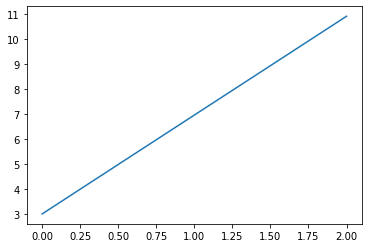

In [339]:
a = 0
b = 2
y_a = 3
y_b = -3
h_0 = 4
steps_count = 1000

x_array = np.linspace(a, b, steps_count)

def f( y, t):
    return [y[1], math.sin(t + y[0]**2)]

result = odeint(f, [y_a, h_0], x_array)
plt.plot(x_array, result[:,0]);                    
# odeint(f(x, y),x0,<вектор x>) где y и f могут быть векторами, что позволяет решать
# системы уравнений и уравнения порядка выше первого

In [340]:
print(result)

[[ 3.          4.        ]
 [ 3.0080088   4.00077899]
 [ 3.01601907  4.00146454]
 ...
 [10.91365368  3.96617545]
 [10.92159592  3.96811749]
 [10.92954196  3.96994666]]


In [341]:
print('y(b, h_0)= {}'.format(result[-1][0]))

y(b, h_0)= 10.929541955615406


Отсюда видно, что $y(b, h_0) \approx 10.93 \quad > \quad y_b = -3$

2. Выберем шаг ∆ℎ и решаем несколько раз задачу Коши при $h_1 = h_0+∆ℎ$. Если снова получили $y_b < y(b, h_1)$, причём $y_b < y(b, h_1) < y(b, h_0)$, решаем задачу Коши при $h_2=h_1+∆ℎ$ и т.д. Процесс повторяется пока не получим неравенство $y(b, h_m) < y_b$.

y(b, h_9)=-2.6395976224761917, h_m-1=-3.2
y(b, h_10)=-4.322945483774759   <   y_b=-3, h_m=-4.0


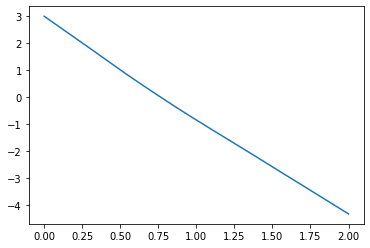

In [342]:
delta_h = -0.8
h = h_0
count = 0

hm_1 = 0
y_b_hm_1 = 0

hm = 0
y_b_hm = 0



while(result[-1][0] > y_b):
    y_b_hm_1 = result[-1][0] # значение y на предыдущем шаге
    hm_1 = h
    
    h += delta_h
    result = odeint(f, [y_a, h], x_array)
    
    y_b_hm = result[-1][0] # значение y на текущем шаге
    hm = h
    
    count+=1

print('y(b, h_{})={}, h_m-1={}'.format(count-1, y_b_hm_1, hm_1))
print('y(b, h_{})={}   <   y_b={}, h_m={}'.format(count, y_b_hm, y_b, hm))
plt.plot(x_array, result[:,0]);    

3-4. Далее применяется стандартный процесс половинного деления к уравнению $y(b, h) = y_b$. Останавливаем процесс, когда выполнится неравенство $|y(b, h_m) - y(b, h_{m-1})| < 0.001$

In [343]:
# Метод половинного деления

E = 0.001

h_min = min(hm, hm_1)
h_max = max(hm, hm_1)

M = 100 # максимальное число шагов
count_M = 0


f_cur = odeint(f, [y_a, hm], x_array)[-1][0]
f_prev = odeint(f, [y_a, hm_1], x_array)[-1][0]

f_min = None
f_max = None

f_min_val = min(f_cur, f_prev)
f_max_val = max(f_cur, f_prev)

avg_f = None
avg_f_val = None
avg_h = None
    

while(abs(f_max_val-f_min_val) >= E and count_M <= M):
    avg_h = h_min + (h_max - h_min)/2
    avg_f =  odeint(f, [y_a, avg_h], x_array)
    avg_f_val = avg_f[-1][0]
    print('h = {}\t\t\ty(b, h) = {}\t\t\tИтерация №{}'.format(round(avg_h, 5), round(avg_f_val,5), count_M))
    
    if(avg_f_val < y_b):
        h_min = avg_h
        f_min = avg_f
        f_min_val = avg_f[-1][0]
    else:
        h_max = avg_h
        f_max = avg_f
        f_max_val = avg_f[-1][0]
        
    count_M+=1
    


print('\nИнтервал h: ({}, {})'.format(round(h_min, 6), round(h_max,6)))
print('Интервал y(b, h): ({}, {})'.format(round(f_min_val, 6), round(f_max_val, 6)))


h = -3.6			y(b, h) = -3.47948			Итерация №0
h = -3.4			y(b, h) = -3.05326			Итерация №1
h = -3.3			y(b, h) = -2.84435			Итерация №2
h = -3.35			y(b, h) = -2.94811			Итерация №3
h = -3.375			y(b, h) = -3.00051			Итерация №4
h = -3.3625			y(b, h) = -2.97427			Итерация №5
h = -3.36875			y(b, h) = -2.98738			Итерация №6
h = -3.37188			y(b, h) = -2.99394			Итерация №7
h = -3.37344			y(b, h) = -2.99723			Итерация №8
h = -3.37422			y(b, h) = -2.99887			Итерация №9
h = -3.37461			y(b, h) = -2.99969			Итерация №10

Интервал h: (-3.375, -3.374609)
Интервал y(b, h): (-3.000511, -2.999689)


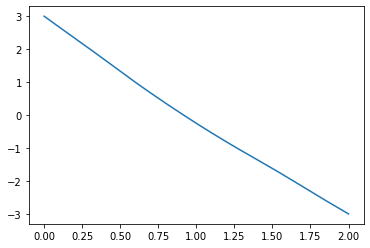

In [344]:
plt.plot(x_array, avg_f[:,0])

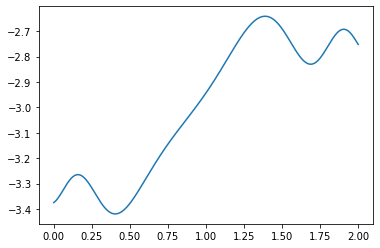

In [345]:
plt.plot(x_array, avg_f[:,1])

## Выводы

Решена краевая задача для уравнения 2-го порядка, основанная на многократном решении задачи Коши. Задача Коши была решена несколько раз до тех пор, пока не было получено неравенство $y(b, h) < y_b$. Таким образом, был найден интервал $(h_{10}, h_9)$, который был обработан методом половинного деления. Достигнута необходимая точность 0,001.  

Интервал h: (-3.375, -3.374609)

Интервал y(b, h): (-3.000511, -2.999689)